<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LINEAR REGRESSION**

Train-Test Split Evaluation

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset:** Used to fit the machine learning model.

**Test Dataset**: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [3]:
car = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/ToyotaCorolla.csv')

In [32]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [52]:
car.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0


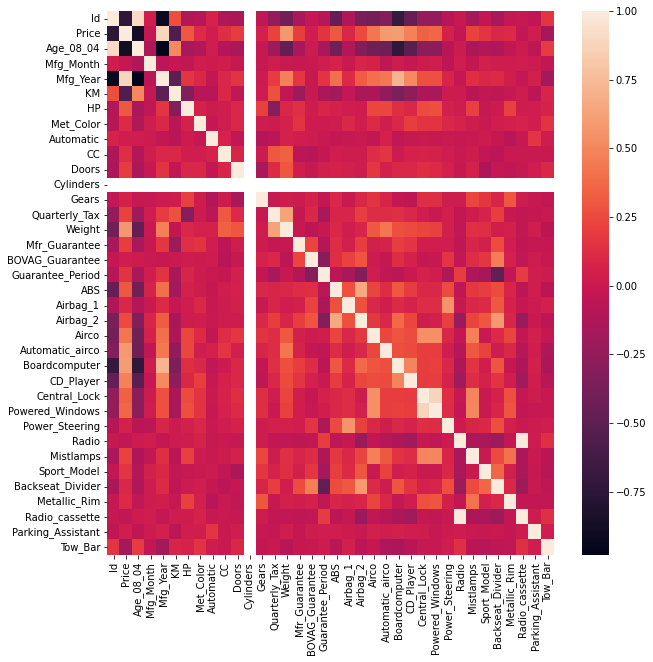

In [59]:
correlation_matrix = car.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data=correlation_matrix,ax=ax)

In [78]:
car.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,NaN,-0.043343,-0.240821,-0.414500,-0.162006,-0.015065,-0.086256,-0.461437,-0.123465,-0.358316,-0.386207,-0.327468,-0.695207,-0.464520,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,-0.049103,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198,0.197802,0.028133,0.146627,0.306138,0.093588,0.248974,0.429259,0.588262,0.601292,0.481374,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,0.044375,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253,-0.164658,0.006865,-0.152563,-0.412887,-0.105406,-0.329017,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,-0.048172,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167,-0.005771,-0.003863,0.029010,0.072532,0.003756,0.076749,0.057088,-0.049017,0.017715,-0.016736,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,0.007113,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,NaN,0.007766,0.193934,0.473478,0.166697,-0.006206,0.148218,0.402215,0.105359,0.317075,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,0.047171,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598,-0.212851,0.001438,-0.138942,-0.177203,-0.018012,-0.139275,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,-0.064318,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614,0.140026,0.022701,0.076163,0.057832,0.025137,0.017644,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.029990,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,0.057929,0.154850,0.010783,0.009295,0.022298,0.100055,0.038416,0.114190,0.027977,0.089886,0.198220,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.036691,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249,0.026194,0.023393,-0.002256,-0.016128,-0.011895,0.001171,-0.028353,0.059057,-0.037069,-0.010967,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.159985,0.018786
CC,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637,-0.057407,-0.081725,-0.017683,0.037806,0.022678,0.024738,0.119888,0.162669,0.009312,0.057787,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002883,0.002725


In [61]:
car['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [76]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


y=car['Price']
X=car.drop(['Price','Cylinders'],axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
#The size of the split can be specified via the “test_size” argument that takes a number
# of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.
#


car_lm = LinearRegression()
car_lm.fit(X_train, y_train)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient':car_lm.coef_}))


        Predictor   coefficient
0              Id -1.675576e-01
1       Age_08_04  1.180061e+08
2       Mfg_Month  1.180061e+08
3        Mfg_Year  1.416074e+09
4              KM -1.694718e-02
..            ...           ...
358     Color_Red  3.948015e+02
359  Color_Silver  3.839593e+02
360  Color_Violet  1.651806e+03
361   Color_White  4.215001e+01
362  Color_Yellow  5.758837e+02

[363 rows x 2 columns]


In [77]:
#!pip install dmba
from dmba import regressionSummary
regressionSummary(y_test, car_lm.predict(X_test))
sum(y_test)


Regression statistics

                      Mean Error (ME) : -1707.3724
       Root Mean Squared Error (RMSE) : 14633.4010
            Mean Absolute Error (MAE) : 3558.8615
          Mean Percentage Error (MPE) : -12.8719
Mean Absolute Percentage Error (MAPE) : 29.4734


3010229

In [ ]:
y=car['Price']
X=car.drop(['Price','Cylinders'],axis=1)
#X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
categorical_features_indices = np.where(X.dtypes == 'object')[0]
categorical_features_indices
!pip install catboost
import catboost as cb

train_dataset = cb.Pool(X_train, y_train,cat_features=categorical_features_indices) 
test_dataset = cb.Pool(X_test, y_test,cat_features=categorical_features_indices)
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100,  200],
        'learning_rate': [0.01, 0.1],
        'depth': [2,  8],
        'l2_leaf_reg': [0.2, 2]}
model.grid_search(grid, train_dataset)
#Let's evaluate performance of model on test and training data using RMSE and r2.


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predX = model.predict(X_test)
regressionSummary(y_test, predX)
sum(y_test)


Regression statistics

                      Mean Error (ME) : -20.1594
       Root Mean Squared Error (RMSE) : 1024.5354
            Mean Absolute Error (MAE) : 727.5490
          Mean Percentage Error (MPE) : -0.9916
Mean Absolute Percentage Error (MAPE) : 7.4353


3010229